In [19]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv("F:\\data\\hr.csv")

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
df.shape

(1470, 35)

In [23]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

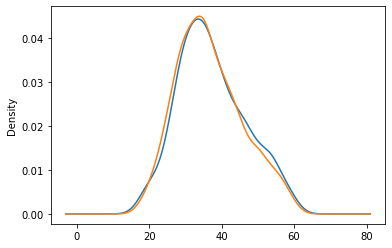

In [30]:
df.groupby('Gender')['Age'].plot(kind='density')

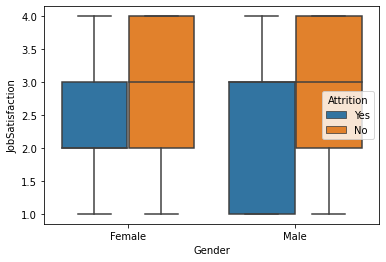

In [34]:
import seaborn as sns
sns.boxplot(data=df,x='Gender',y='JobSatisfaction',hue='Attrition')


In [38]:
df.groupby('Attrition')['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

In [45]:
df.groupby('Gender')['MonthlyIncome'].mean()

Gender
Female    6686.566327
Male      6380.507937
Name: MonthlyIncome, dtype: float64

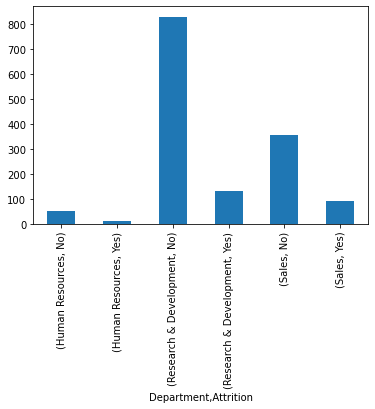

In [48]:
df.groupby('Department')['Attrition'].value_counts().sort.plot(kind='bar')

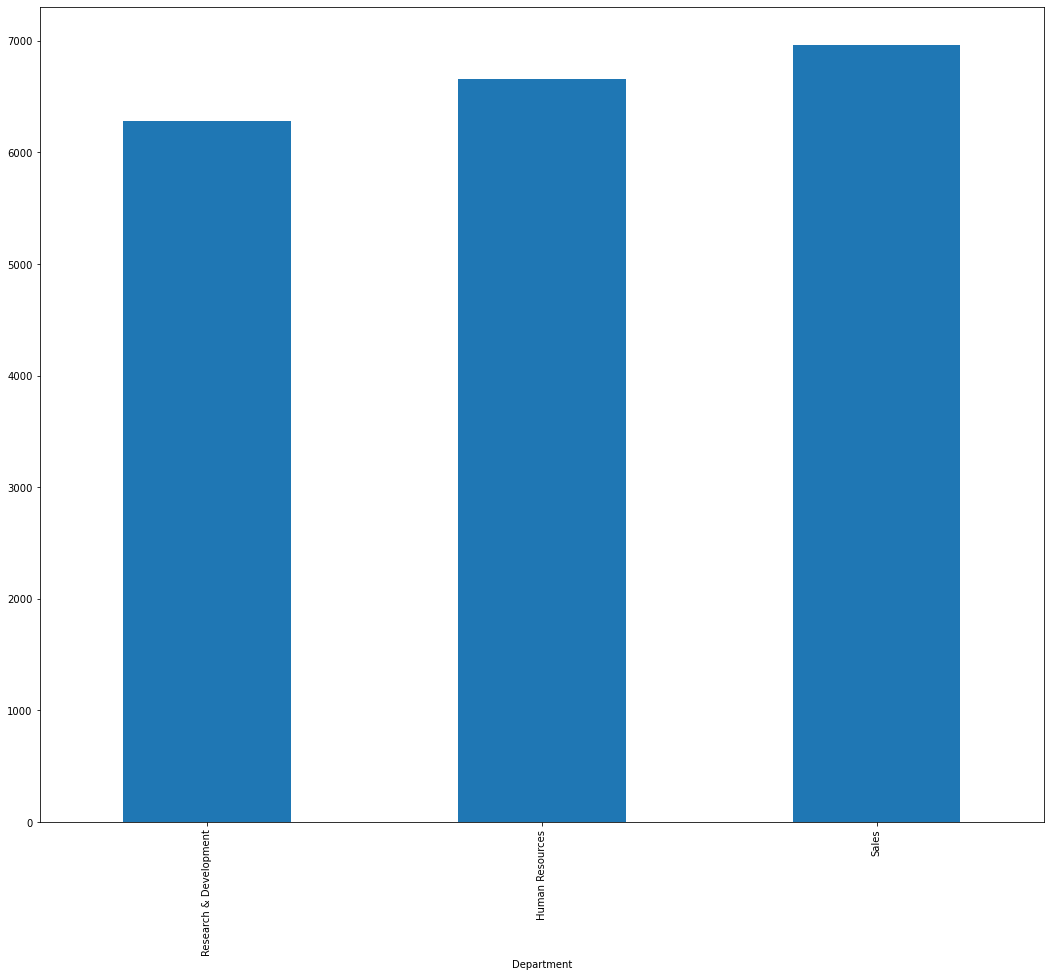

In [68]:
df.groupby('Department')['MonthlyIncome'].mean().sort_values().plot(kind='bar')

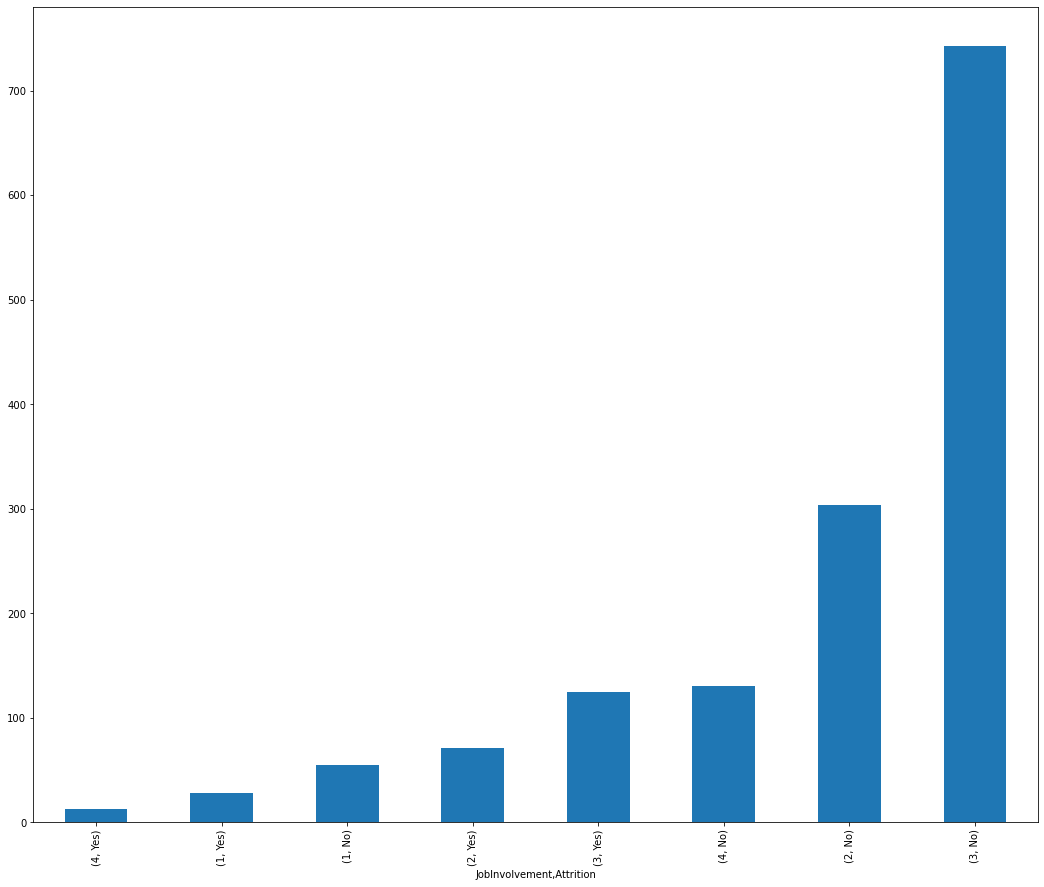

In [74]:
df.groupby('JobInvolvement')['Attrition'].value_counts().sort_values().plot(kind='bar')

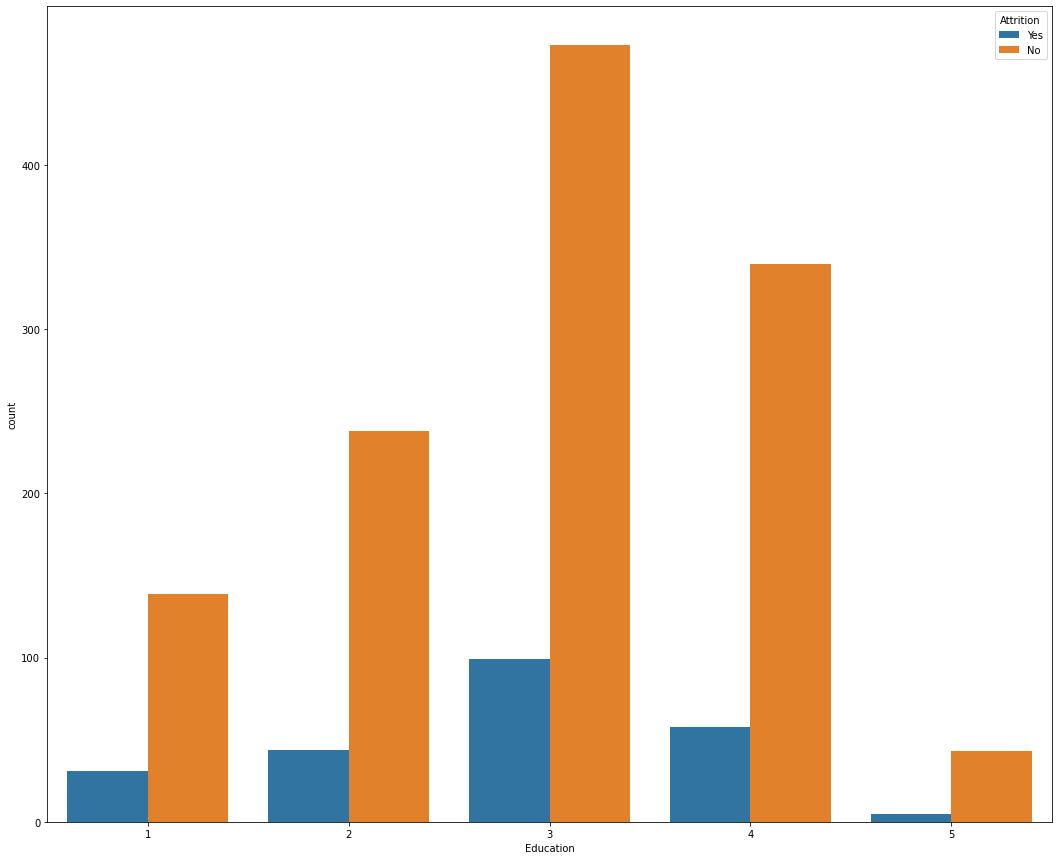

In [81]:
sns.countplot(data=df,x='Education',hue='Attrition')

In [101]:
cor = df[['Age','DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                        'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']].copy()

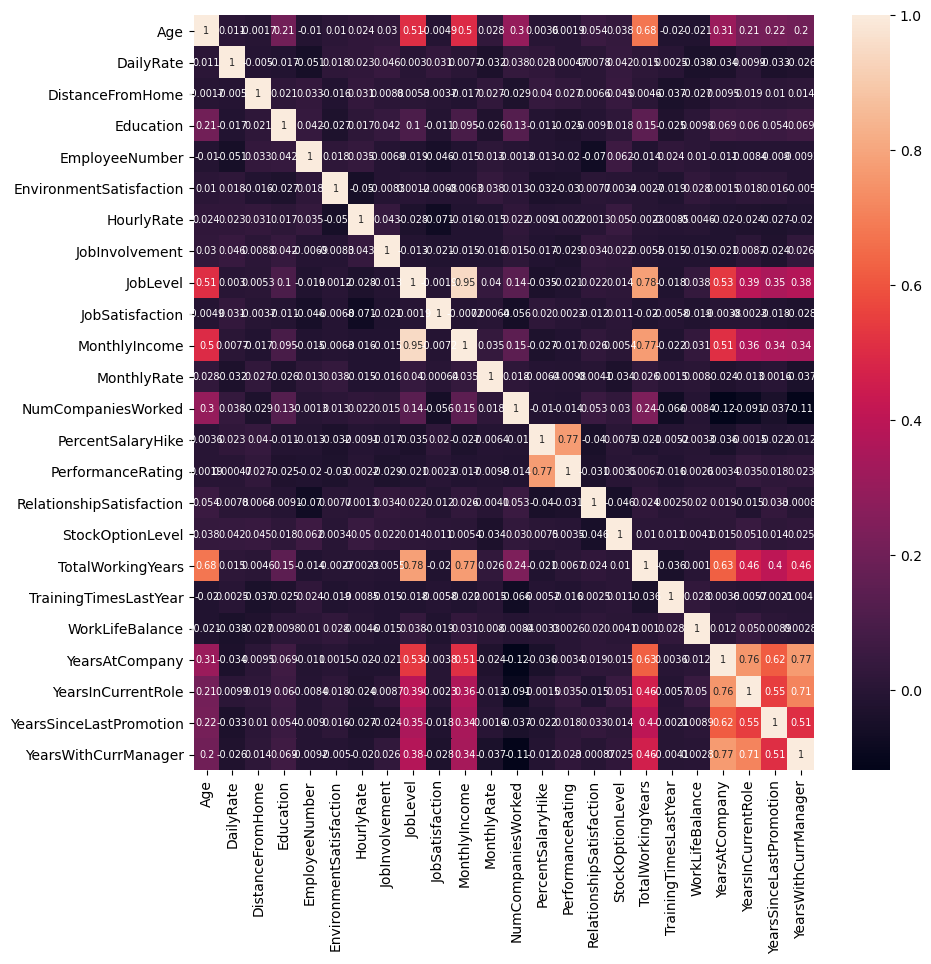

In [102]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(cor.corr(),annot=True,annot_kws={"size": 7})

In [103]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [113]:
correlation(cor, 0.6)

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

In [117]:
df['Attrition'].unique()


array(['Yes', 'No'], dtype=object)

In [118]:
df['Attrition']=df["Attrition"].map({'Yes':1,'No':0})

In [124]:
 Xnum=df[['Age','DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                        'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']].copy()
ynum=df['Attrition']

In [125]:

from sklearn.feature_selection import SelectKBest,chi2
feature= SelectKBest(score_func=chi2,k=8)
feature_score=feature. fit(Xnum,ynum)
scores=feature_score.scores_

In [127]:
Xnum.shape

(1470, 24)

In [126]:
best=pd.DataFrame(scores,columns=['score'])
best

,score
0,84.155277
1,956.580494
2,63.772142
3,0.520642
4,58.120326
5,6.890594
6,0.431779
7,4.605616
8,24.939242
9,7.011947


In [129]:
fea=pd.DataFrame(Xnum.columns,columns=['feature'])
best_score=pd.concat([fea,best],axis=1)
best_score

,feature,score
0,Age,84.155277
1,DailyRate,956.580494
2,DistanceFromHome,63.772142
3,Education,0.520642
4,EmployeeNumber,58.120326
5,EnvironmentSatisfaction,6.890594
6,HourlyRate,0.431779
7,JobInvolvement,4.605616
8,JobLevel,24.939242
9,JobSatisfaction,7.011947


In [137]:
best_score.nlargest(24,'score')

,feature,score
10,MonthlyIncome,127922.293694
11,MonthlyRate,1196.633553
1,DailyRate,956.580494
17,TotalWorkingYears,230.721618
20,YearsAtCompany,142.100054
21,YearsInCurrentRole,117.522596
23,YearsWithCurrManager,110.671534
0,Age,84.155277
2,DistanceFromHome,63.772142
4,EmployeeNumber,58.120326


we drop all featurs which has single digit score 

In [ ]:
df[['Age','DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                        'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']]

In [138]:
df1=df.drop(['PerformanceRating','PercentSalaryHike','HourlyRate','Education','WorkLifeBalance','RelationshipSatisfaction','TrainingTimesLastYear','JobInvolvement','NumCompaniesWorked','EnvironmentSatisfaction','JobSatisfaction','YearsSinceLastPromotion'],axis=1)

In [139]:
df_c=df1[[ 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole','MaritalStatus',
                       'Over18', 'OverTime']].copy()

In [140]:
df_oneh = pd.get_dummies(df_c,drop_first=True)
df_oneh.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [146]:
df_final=pd.concat([df1,df_oneh],axis=1)

In [149]:
df_final.drop([ 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole','MaritalStatus',
                       'Over18', 'OverTime'],axis=1,inplace=True)

In [ ]:
df.final

In [150]:
X=df_final.drop(['Attrition'],axis=1,)
y=df_final['Attrition']

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [155]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X,y)
dec.score(X,y)

1.0

In [157]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dec, X, y, cv=10)

In [159]:
scores.mean()

0.7442176870748299

In [160]:
y_pred=dec.predict(X_test)

In [161]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [162]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report
mat=confusion_matrix(y_test,y_pred)

In [163]:
mat

array([[298,   0],
       [  0,  70]], dtype=int64)

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00        70

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

